# Analisis explroatorio de los datos

En este script nos centraremos en analizar la variable precio, tanto su comportamiento como relacion con las demas variables

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# Datos

In [10]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

In [11]:
dfp=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfanalisis')
dfp.head()

,precio,area,habitaciones,banos,garajes,balcon,trasn. publico,estrato,antiguedad,cocina,...,zonas verdes,supermercado o cc,instalacion de gas,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,municipio,tipo_propiedad
0,1380000000,320.00,5,6.0,2,1.0,1.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,casa
1,496122600,91.97,3,3.0,1,1.0,1.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,rionegro,apartamento
2,570000000,150.00,3,3.0,1,1.0,1.0,5.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,san antonio de pereira,casa
3,290000000,106.00,3,3.0,1,0.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,marinilla,casa
4,360002000,73.37,3,3.0,0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,rionegro,apartamento


In [12]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   precio                    2144 non-null   int64  
 1   area                      2144 non-null   float64
 2   habitaciones              2144 non-null   int64  
 3   banos                     2144 non-null   float64
 4   garajes                   2144 non-null   int64  
 5   balcon                    2144 non-null   float64
 6   trasn. publico            2144 non-null   float64
 7   estrato                   2144 non-null   float64
 8   antiguedad                2144 non-null   float64
 9   cocina                    2144 non-null   float64
 10  bano aux                  2144 non-null   float64
 11  zona lavanderia           2144 non-null   float64
 12  zonas verdes              2144 non-null   float64
 13  supermercado o cc         2144 non-null   float64
 14  instalac

# Analisis univariado

In [13]:
dfp['precio'].describe()

count    2.144000e+03
mean     6.420125e+08
std      5.008978e+08
min      1.490000e+08
25%      3.100000e+08
50%      4.400000e+08
75%      7.800000e+08
max      2.300000e+09
Name: precio, dtype: float64

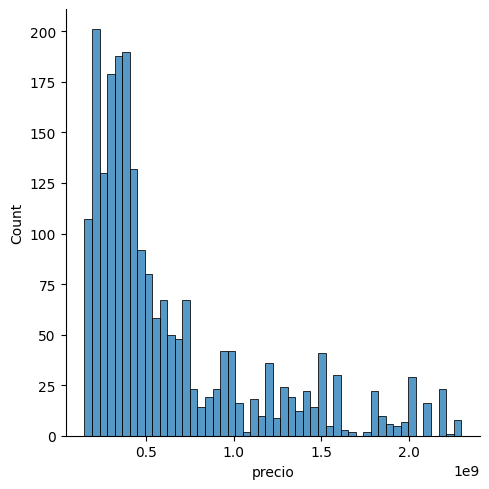

In [14]:
# distribucion de la variable precio
sns.displot(dfp['precio'],bins=50)

Se puede observar un sesgo hacia la izquierda de los datos, es decir, la concentracion de datos de precios de viviendas se concentra en los precios mas bajos, es mas difcil encontrar viviendas con precios altos 

In [15]:
# precio de las 5 viviendas mas costosas
dfp['precio'].nlargest(5)

14     2300000000
31     2300000000
92     2300000000
261    2300000000
504    2300000000
Name: precio, dtype: int64

In [16]:
# precio de las 5 viviendas mas economicas
dfp['precio'].nsmallest(5)

1946    149000000
1006    150000000
1818    150000000
1855    150000000
1860    150000000
Name: precio, dtype: int64

Se puede observar un sesgo hacia la izquierda de los datos, es decir, la concentracion de datos del area de las viviendas se concentra en las areas mas bajos, es mas difcil encontrar viviendas con grandes extensidades de terreno.
De aqui se puede deducir que hay un auge en la venta de apartamentos

# Analisis bivariado

Se encontrara la relacion de la variable precio con las demas variables

<AxesSubplot:xlabel='precio', ylabel='area'>

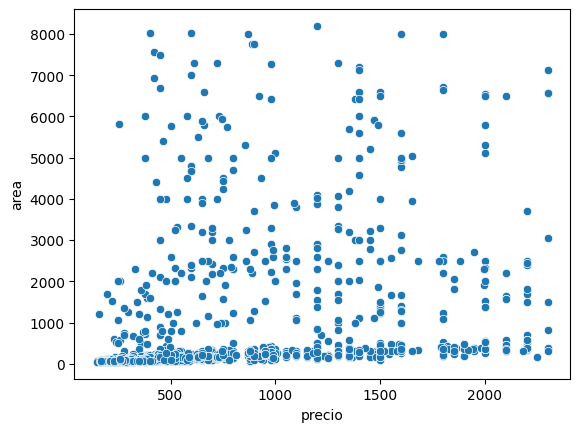

In [20]:
# Relacion entre el precio y el area de las viviendas
sns.scatterplot(x=(dfp['precio']/1000000),y=dfp['area'])

Se puede observar que no hay una relacion muy clara entre el precio y el area, es algo contraditorio, ya que se suele pensar que a mayor area , mayor sera el precio

In [48]:
dfestrato_precio = dfp.groupby('estrato')['precio'].agg(['mean', 'min', 'max'])
dfestrato_precio


,mean,min,max
estrato,,,
1.0,2.500000e+08,160000000,340000000
2.0,4.869032e+08,186000000,1400000000
3.0,4.738341e+08,149000000,2200000000
4.0,5.323130e+08,150000000,2300000000
5.0,9.269320e+08,160000000,2300000000
6.0,1.214018e+09,260000000,2300000000


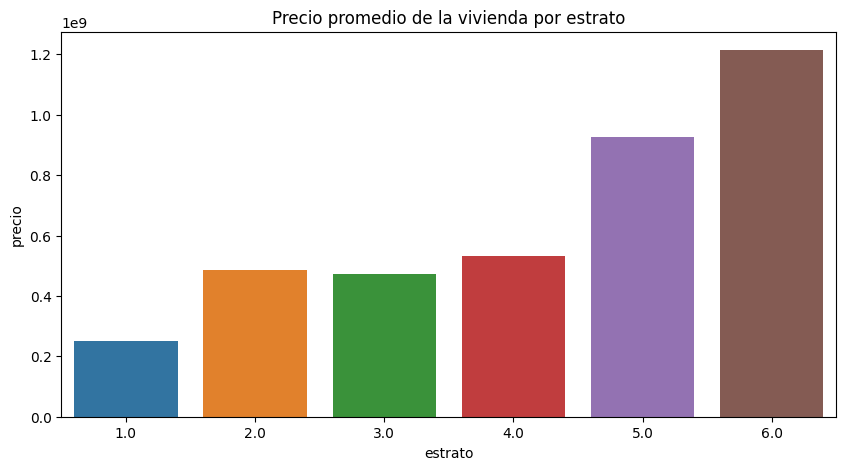

In [78]:
df_promedioestrato = dfp.groupby('estrato')['precio'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10, 5)) # Tamaño de la figura (ancho, alto)
ax=sns.barplot(x='estrato', y='precio', data=df_promedioestrato)
ax.set_title('Precio promedio de la vivienda por estrato')
plt.show()


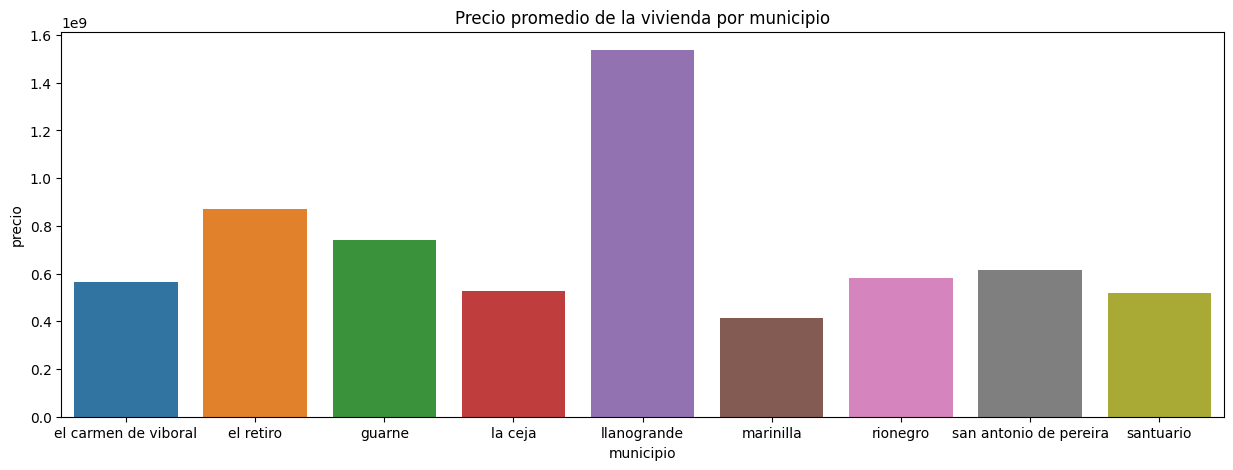

In [76]:
df_promediomuni = dfp.groupby('municipio')['precio'].mean().reset_index()
fig, ax = plt.subplots(figsize=(15, 5)) # Tamaño de la figura (ancho, alto)
ax=sns.barplot(x='municipio', y='precio', data=df_promediomuni)
ax.set_title('Precio promedio de la vivienda por municipio')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.show()

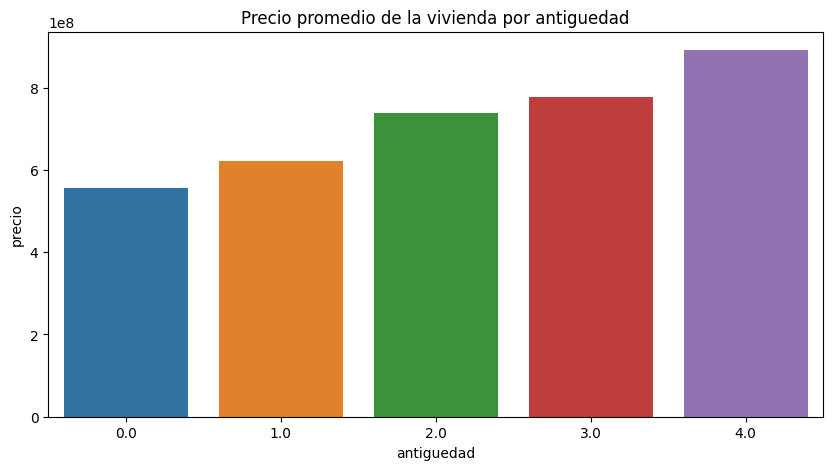

In [79]:
df_promedioantig = dfp.groupby('antiguedad')['precio'].mean().reset_index()
gif,ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='antiguedad',y='precio',data=df_promedioantig)
ax.set_title('Precio promedio de la vivienda por antiguedad')
plt.show()

# Analisis multivariado

Se plantea la busqueda de relaciones y observaciones entre mas de 2 variables

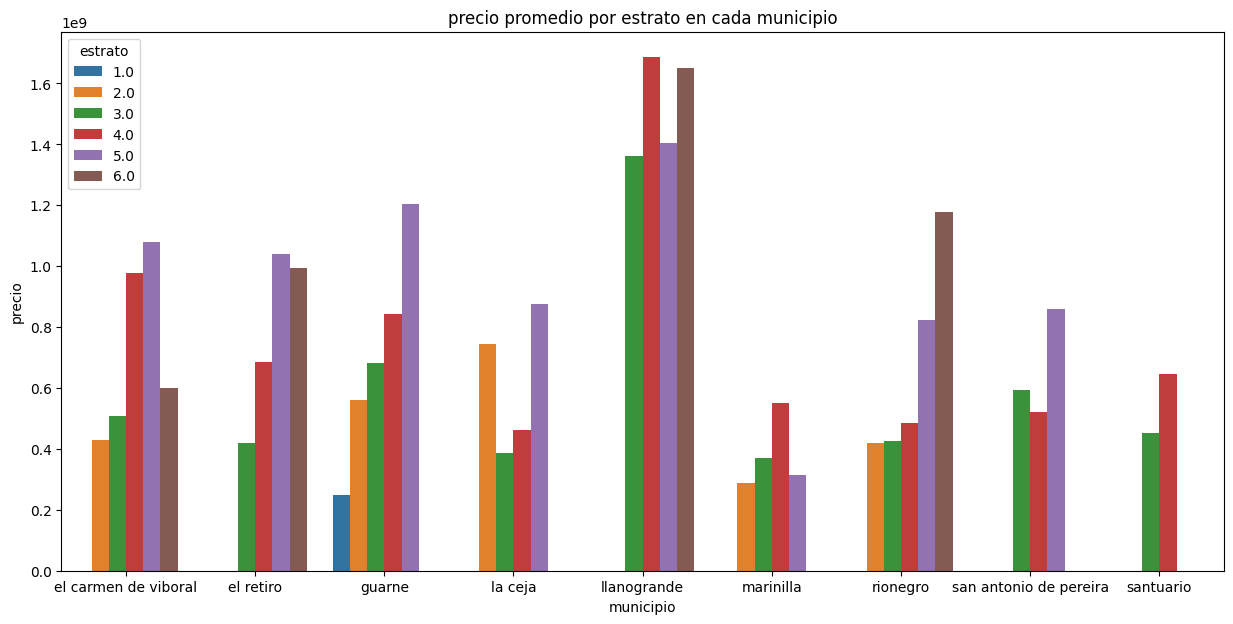

In [84]:
# precio promedio por estrato en cada municipio
df_prom_estr_muni = dfp.groupby(['municipio','estrato'])['precio'].mean().reset_index()
ax , fig = plt.subplots(figsize=(15,7))
ax = sns.barplot(x='municipio', y='precio', hue='estrato', data=df_prom_estr_muni)
ax.set_title('precio promedio por estrato en cada municipio')
plt.show()

## Correlacion entre variables

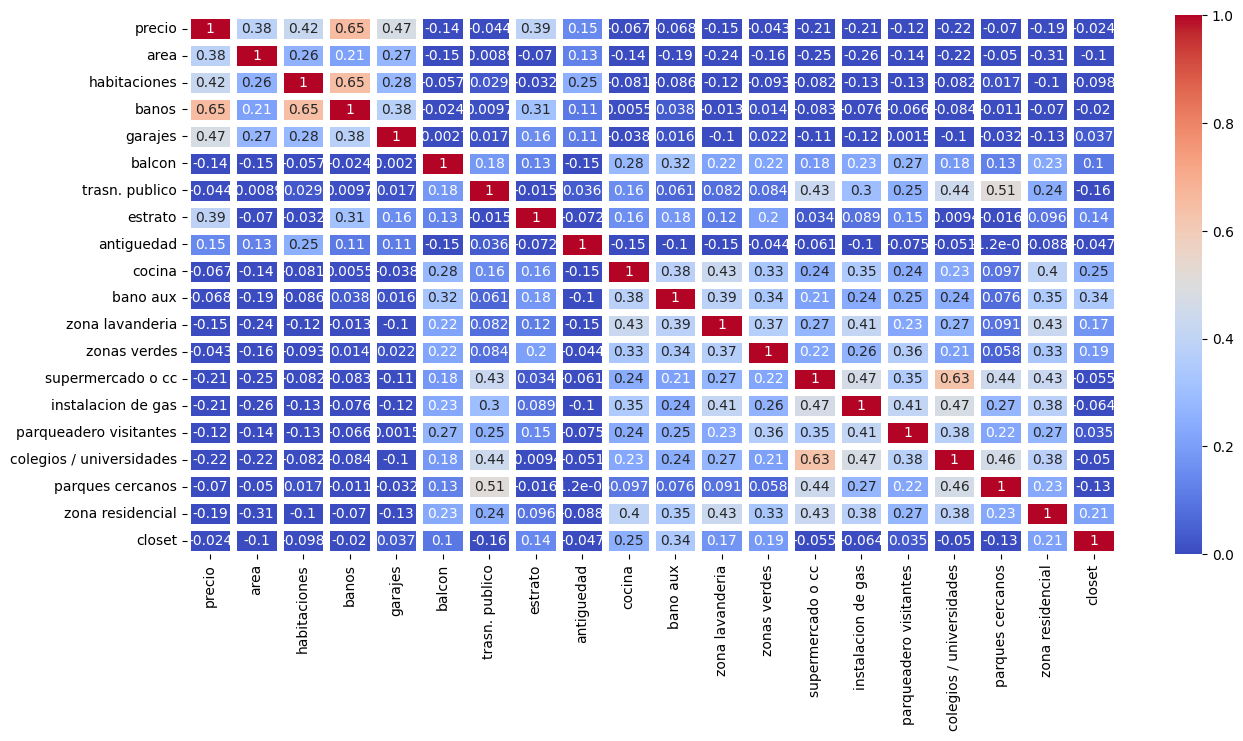

In [91]:
ax , fig = plt.subplots(figsize=(15,7))
ax = sns.heatmap(dfp.corr(), annot=True, 
            linewidths=5, linecolor='white',  # Grosor y color de la separación.
            cmap='coolwarm', vmin=0);  # vmin representa el valor mínimo del colormap, para tener el rango completo entre 0 y 1.
plt.show()

Se puede observar una baja correlacion entre la variable precio y las demas variables, algo que puede perjudicar a la hora de hacer un analisis mas profundo y de prediccion